In [1]:
import os
from tools import FileTools as ft
import RetinotopicMapping as rm
import skimage.external.tifffile as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
%matplotlib inline

In [2]:
example_folder = os.path.join('G:', 'My Drive', 'Data','misc')
example_folder = 'G:\\My Drive\\Data\\misc'
os.chdir(example_folder)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'G:\\My Drive\\Data\\misc'

In [24]:
maps=sio.loadmat('isi_maps.mat')

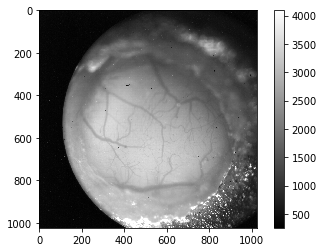

In [25]:
vasculature_map = tf.imread('im.tif')
_ = plt.imshow(vasculature_map, cmap='gray', interpolation='nearest')
_ = plt.colorbar()
plt.show()

In [38]:
def scale(x, out_range=(-1, 1), axis=None):
    domain = np.min(x, axis), np.max(x, axis)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

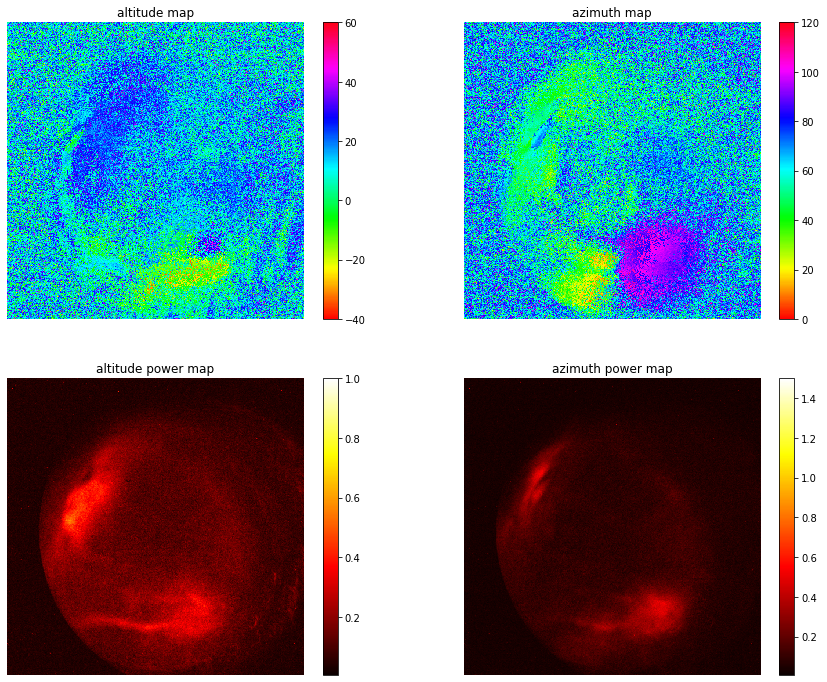

In [40]:
#altitude_map = tf.imread('retinotopy_elevation map.tiff')
#azimuth_map = tf.imread('retinotopy_azimuth map.tiff')
#altitude_power_map = tf.imread('horizontal_power.tiff')
#zimuth_power_map = tf.imread('vertical_power.tiff')
altitude_map = scale(maps['elevation_map'],out_range=(-40, 60))
azimuth_map = scale(maps['azimuth_map'],out_range=(0, 120))
altitude_power_map = maps['elevation_power_map']
azimuth_power_map = maps['azimuth_power_map']

f = plt.figure(figsize=(15, 12))
ax1 = f.add_subplot(221)
fig1 = ax1.imshow(altitude_map, vmin=-40, vmax=60, cmap='hsv', interpolation='nearest')
ax1.set_axis_off()
ax1.set_title('altitude map')
_ = f.colorbar(fig1)

ax2 = f.add_subplot(222)
fig2 = ax2.imshow(azimuth_map, vmin=0, vmax=120, cmap='hsv', interpolation='nearest')
ax2.set_axis_off()
ax2.set_title('azimuth map')
_ = f.colorbar(fig2)

ax3 = f.add_subplot(223)
fig3 = ax3.imshow(altitude_power_map, cmap='hot', interpolation='nearest')
ax3.set_axis_off()
ax3.set_title('altitude power map')
_ = f.colorbar(fig3)

ax4 = f.add_subplot(224)
fig4 = ax4.imshow(azimuth_power_map, cmap='hot', interpolation='nearest')
ax4.set_axis_off()
ax4.set_title('azimuth power map')
_ = f.colorbar(fig4)

In [49]:
params = {
          'phaseMapFilterSigma': 0.5,
          'signMapFilterSigma': 8.,
          'signMapThr': 0.01,
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [50]:
trial = rm.RetinotopicMappingTrial(altPosMap=altitude_map,
                                   aziPosMap=azimuth_map,
                                   altPowerMap=altitude_power_map,
                                   aziPowerMap=azimuth_power_map,
                                   vasculatureMap=vasculature_map,
                                   mouseID='test',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

In [43]:
import sys
sys.path.append('C:\\code\\retinotopic_mapping-master\\retinotopic_mapping')
import importlib
importlib.reload(rm)

<module 'RetinotopicMapping' from 'C:\\code\\retinotopic_mapping-master\\retinotopic_mapping\\RetinotopicMapping.py'>

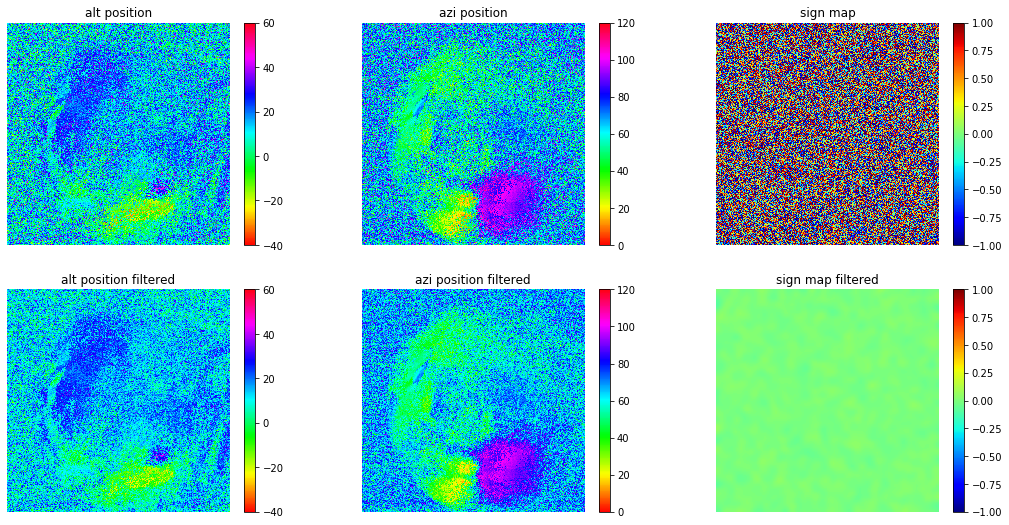

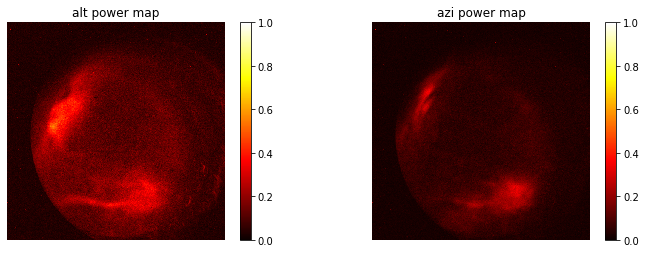

In [51]:
_ = trial._getSignMap(isPlot=True)
plt.show()

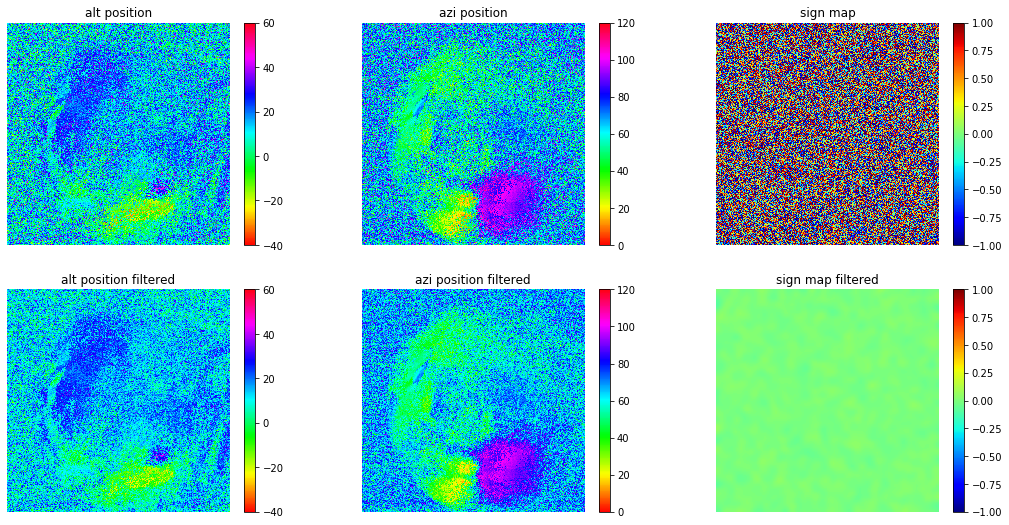

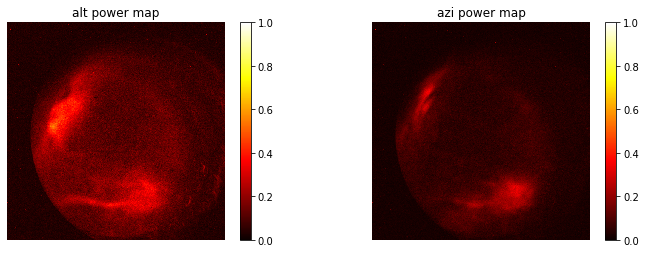

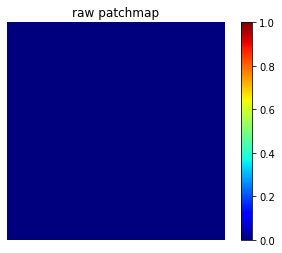

UnboundLocalError: local variable 'currPatch' referenced before assignment

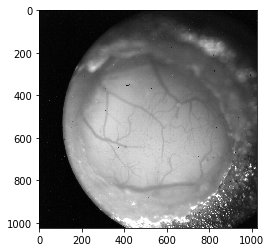

In [44]:
trial.processTrial(isPlot=True)